# Playing flipper with MNIST

With the Fast.ai library it not much work to train an image classifier with transfer learning. 

#### Training method
- Transfer learning with resnet34
- Training of final layer only
- Cyclic annealing of learning rate
- Training of all layers with differential learning rates

#### Result
The accuracy on the validation set is 96.39%.

#### Error analysis
The error analysis reveals the challenges for a human to determine if an image is flipped or not. 
In particular:
- Many errors are mode on the 1, as the original version of one person may resemble the flipped version of another person
- The 8 also shows quite some errors, for the same reason
- Sometime the original characters do not clearly fit any number
- 2 looks like a vertically flipped 5 and the other way around
- 3 is also symmetric onder vertical flips

#### Discussion 
Recognizing flips in MNIST turns out to be a harder problem than recognizing the characters themselves. Any character must now belong to 1 of 20 classes, some of which are very similar. Several characters are approximately invariant under vertical flips. Furthermore, a character in one person's handwriting may look like a flipped character in another person's handwriting (2 and 5). 

In addition to geometry, the classifier may obtain information from stroke patterns like pressure, curvature, speed. If the number of handwritings is small and the number of examples per handwriting large, this should add a significant amount of information. However, handwritings vary a lot per person. The large variation in handwriting in MNIST dilutes the information content of the stroke patterns.

### Load dataset

In [23]:
import sys
sys.path.append('/home/paperspace/fastai')
from fastai.conv_learner import *
PATH = '/home/paperspace/data/flipped_mnist'

In [22]:
%ls {PATH}

dev/  train/


In [ ]:
batch_size = 128
arch=resnet34
tfms=tfms_from_model(arch, batch_size)
learning_rate = 2e-3
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, batch_size))
learn = ConvLearner.pretrained(arch, data, precompute=True)

### Find the learning rate

In [53]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 80%|███████▉  | 750/938 [00:10<00:02, 68.50it/s, loss=1.69]

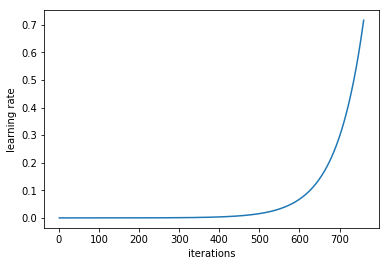

 80%|███████▉  | 750/938 [00:30<00:07, 24.98it/s, loss=1.69]

In [56]:
learn.sched.plot_lr()

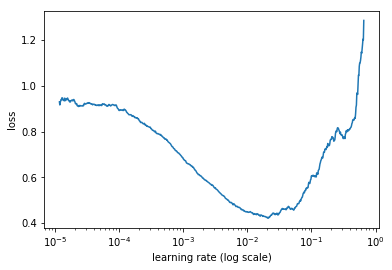

In [57]:
learn.sched.plot()

### Train the final layer

In [58]:
learn.fit(learning_rate, 4)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

 35%|███▌      | 330/938 [00:05<00:09, 64.94it/s, loss=0.401]

Exception in thread Thread-28:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy   
    0      0.318591   0.236117   0.9046    
    1      0.281018   0.200349   0.9236    
    2      0.255374   0.182539   0.9275    
    3      0.234226   0.167464   0.9351    



[array([ 0.16746]), 0.93510000000000004]

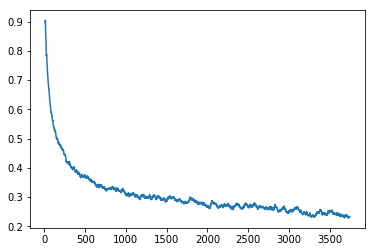

In [63]:
learn.sched.plot_loss()

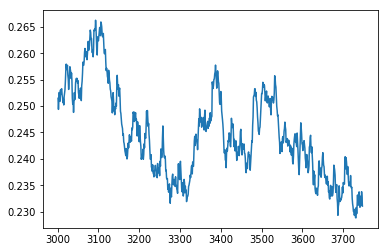

In [62]:
learn.sched.plot_loss(n_skip=3000)

In [68]:
learn.save('resnet34-v1')

### Train final layer further with cyclical learning rate

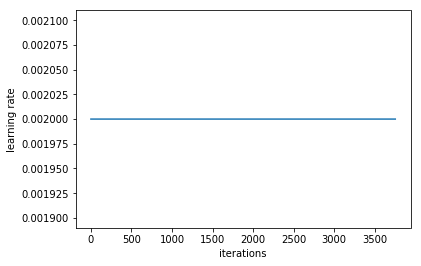

In [65]:
learn.sched.plot_lr()

In [66]:
learn.fit(learning_rate, 4, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss   accuracy   
    0      0.231452   0.163432   0.9372    
    1      0.232779   0.159898   0.9386    
    2      0.237755   0.156204   0.9388    
    3      0.223727   0.152668   0.942     



[array([ 0.15267]), 0.94199999999999995]

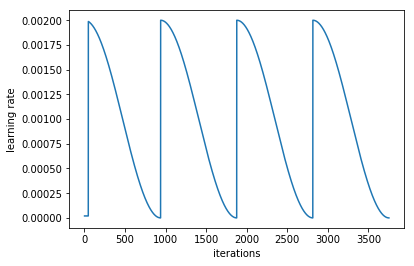

In [48]:
learn.sched.plot_lr()

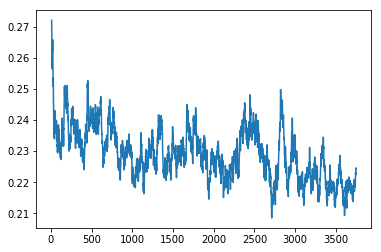

In [67]:
learn.sched.plot_loss()

In [69]:
learn.save('resnet18-v2')

In [ ]:
learn.fit(learning_rate, 4, cycle_len=4, cycle_mult=2 )

HBox(children=(IntProgress(value=0, description='Epoch', max=60), HTML(value='')))

epoch      trn_loss   val_loss   accuracy   
    0      0.210953   0.153774   0.9424    
    1      0.192174   0.143132   0.9448    
    2      0.204798   0.143827   0.9467    
    3      0.193702   0.142581   0.9471    
    4      0.20899    0.139151   0.9472    
    5      0.203597   0.135521   0.9494    
    6      0.203835   0.132983   0.9504    
    7      0.201205   0.131765   0.9521    
    8      0.189194   0.12913    0.9535    
    9      0.197142   0.129079   0.9515    
    10     0.184794   0.12684    0.9539    
    11     0.178377   0.127594   0.9541    
    12     0.181054   0.125188   0.9543    
    13     0.174589   0.124307   0.9552    
    14     0.181791   0.123004   0.9551    
    15     0.190342   0.124008   0.9539    
    16     0.168498   0.119307   0.9577    
    17     0.171595   0.117319   0.9579    
    18     0.165545   0.115775   0.958     
    19     0.162663   0.115237   0.958     
    20     0.15837    0.116463   0.9571    
    21     0.165119   0.113298 

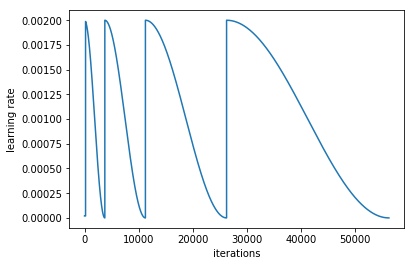

In [75]:
learn.sched.plot_lr()

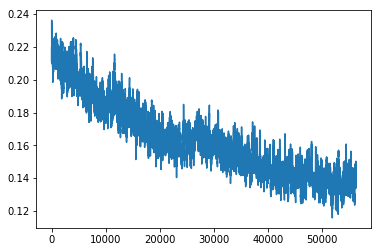

In [76]:
learn.sched.plot_loss()

In [95]:
learn.save('resnet34-v3')

### Training lower layers with differential learning rate annealing

In [200]:
learn.load('resnet34-v3')

In [201]:
learn.unfreeze()
lr=np.array([1e-2,1e-1,1]) * learning_rate 

In [202]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

 17%|█▋        | 160/938 [00:09<00:45, 16.96it/s, loss=0.132]

Exception in thread Thread-109:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy   
    0      0.146151   0.099492   0.9629    
    1      0.138706   0.100421   0.9635    
    2      0.135552   0.100177   0.9629    



[array([ 0.10018]), 0.96289999999999998]

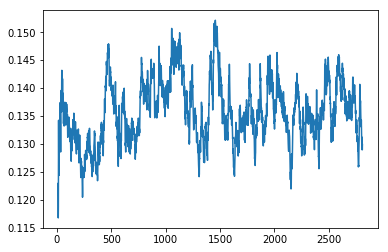

In [203]:
learn.sched.plot_loss()

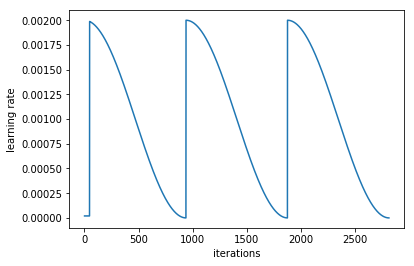

In [205]:
learn.sched.plot_lr()

In [206]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy   
    0      0.133545   0.101147   0.9604    
    1      0.138187   0.098222   0.964     
    2      0.135415   0.099765   0.9627    
    3      0.127186   0.098488   0.9637    
    4      0.141648   0.100123   0.9601    
    5      0.138615   0.098434   0.9635    
    6      0.130924   0.097565   0.9639    



[array([ 0.09757]), 0.96389999999999998]

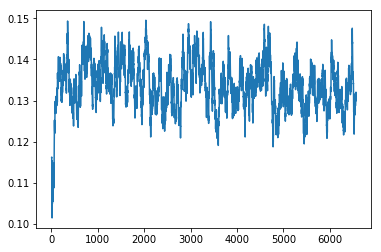

In [209]:
learn.sched.plot_loss()

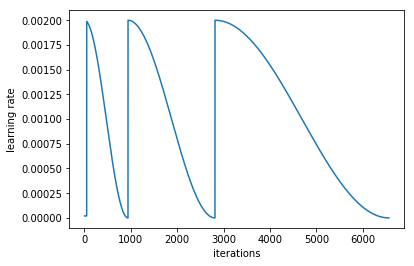

In [210]:
learn.sched.plot_lr()

In [211]:
learn.save('resnet34-v4')

## Error analysis

In [105]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.load('resnet34-v3')
scores = learn.predict()
pred = np.argmax(scores, axis=1)
correct = data.val_y == pred

In [106]:
correct.mean()

0.96079999999999999

In [111]:
~correct

array([False, False, False, ..., False, False, False], dtype=bool)

In [135]:
img.shape

(3, 128, 128)

In [ ]:
data.val_ds.denorm()

In [155]:
idx_incorrect = np.where(~correct)[0]
imgs_incorrect = np.stack([data.val_ds[idx][0] for idx in idx_incorrect])
imgs_incorrect = data.val_ds.denorm(imgs_incorrect)

In [158]:
labels_incorrect = data.val_y[idx_incorrect]

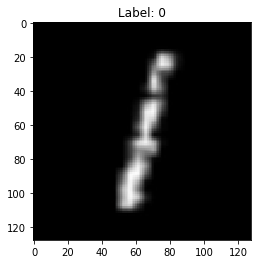

In [165]:
def plot_incorrect(i):
    plt.imshow(imgs_incorrect[i])
    plt.title(f"Label: {labels_incorrect[i]}");
    

fig, axes = plt.subplots(1, 3)
for i in 
    plot_incorrect(0)

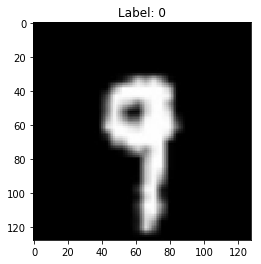

In [167]:
    plot_incorrect(1)

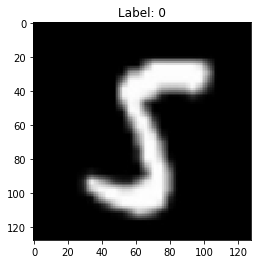

In [170]:
plot_incorrect(2)
# This look like flipped 2

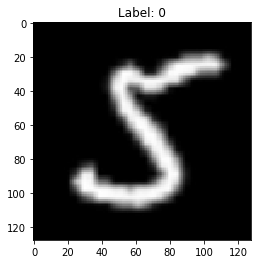

In [171]:
plot_incorrect(3)
# This look like flipped 2?

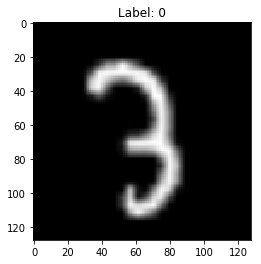

In [173]:
plot_incorrect(4)
# Usually the upper part of the number 3 is small
# In this picture it is reversed

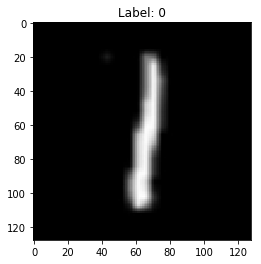

In [174]:
plot_incorrect(5)
# Stroke is lighter at the top.
# I write the 1 from top to bottom, placing more weigth at the top of the character
# Based on my own writing, I would say this is a flipped 1

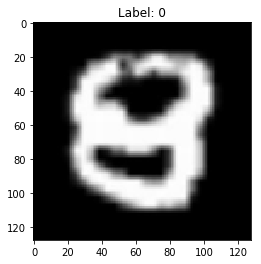

In [176]:
plot_incorrect(6)
# I guess bottom of 8 is usually heavier than top. This image is other way around.
# That may be reason of wrong classification

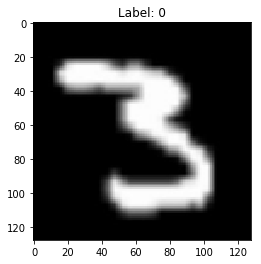

In [177]:
plot_incorrect(7)
# This looks like a three, to me. Bottom is havier than top.
# No idea why this is classified as fliped

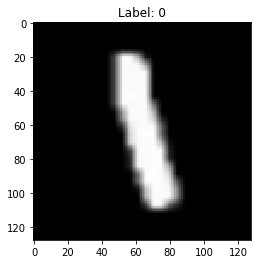

In [180]:
plot_incorrect(8)
# Number one is just tricky

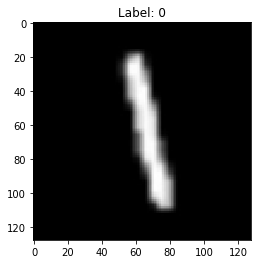

In [181]:
plot_incorrect(9)
# Number one is just tricky

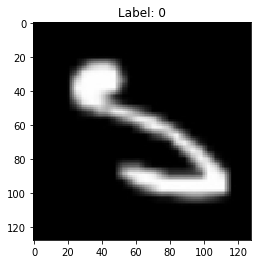

In [182]:
plot_incorrect(10)
# Would this look like at 7, 2 or 5 if flipped?
# Not recginisable as number in this way

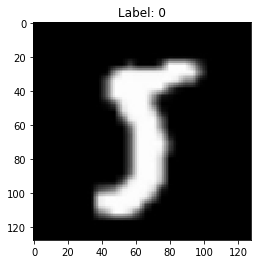

In [184]:
plot_incorrect(11)
# Looks like 5 flipped horizontally
# Or perhaps 2 flipped vertically

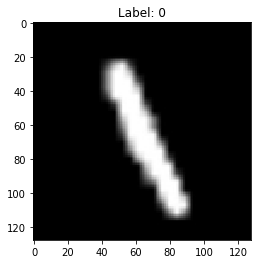

In [185]:
plot_incorrect(12)
# 

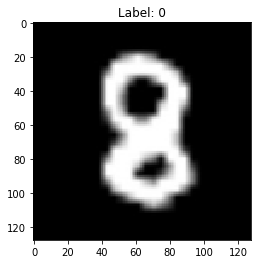

In [186]:
plot_incorrect(13)

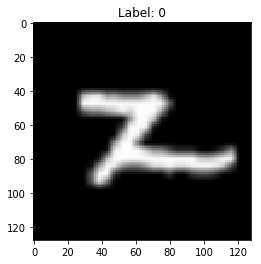

In [187]:
plot_incorrect(14)

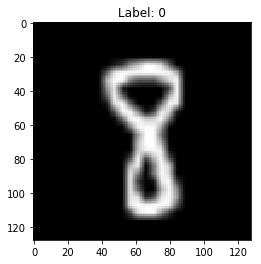

In [188]:
plot_incorrect(15)

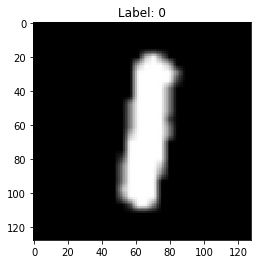

In [189]:
plot_incorrect(16)

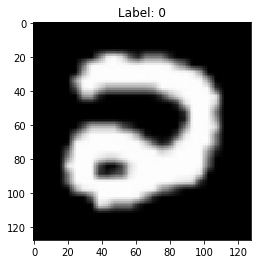

In [190]:
plot_incorrect(17)

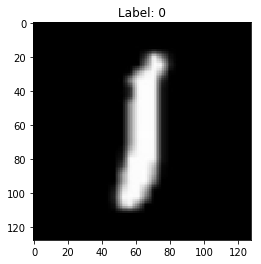

In [191]:
plot_incorrect(18)

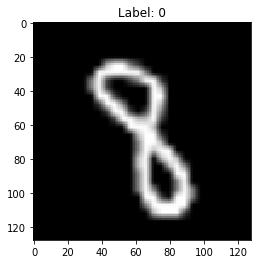

In [192]:
plot_incorrect(19)

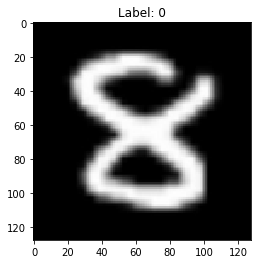

In [193]:
plot_incorrect(20)

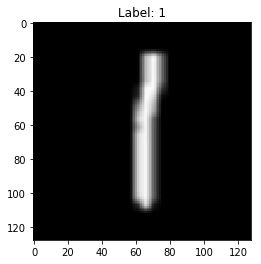

In [194]:
plot_incorrect(300)

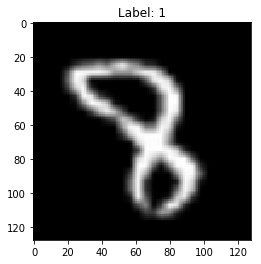

In [195]:
plot_incorrect(301)

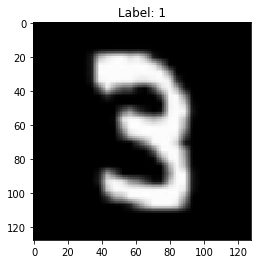

In [196]:
plot_incorrect(302)
# Start 

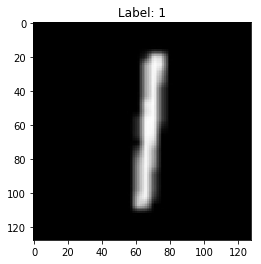

In [198]:
plot_incorrect(303)

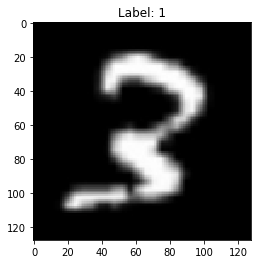

In [199]:
plot_incorrect(304)